In [ ]:
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder \
    .appName("ParquetExample1") \
    .master("local[2]") \
    .getOrCreate()

# Load Parquet file into a DataFrame
df = spark.read.parquet("/afs/cern.ch/user/v/valentem/eoswork/ATLAS/FCS/condor/outputs/PARQUET/FCS_BinnedShower/20250820/file.parquet")

# Show the first few rows
df.show()

# Print the schema
df.printSchema()

+-------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|evt_num|run_num|       a4empfjets_pt|      a4empfjets_eta|      a4empfjets_phi|        a4empfjets_m|     a4empfjets_time|a4empfjets_nconst|     a4emtopojets_pt|    a4emtopojets_eta|    a4emtopojets_phi|      a4emtopojets_m|   a4emtopojets_time|a4emtopojets_nconst|    a4truthwzjets_pt|   a4truthwzjets_eta|   a4truthwzjets_phi|     a4truthwzjets_m|
+-------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "jet1_pt": [10, 20, 30],
    "jet1_eta": [-1., 2., 2.5],
    "jet1_phi": [-2., 1., -0.3],
    "jet1_m": [20., 10., 50.],
    "jet2_pt": [1023, 2012, 3954],
    "jet2_eta": [-1.01, 3., -1.5],
    "jet2_phi": [-2.1, 1.4, -2.3],
    "jet2_m": [2446., 1222., 100.],
})
df

In [ ]:
def func(data):
    deta = data['jet1_eta'] - data['jet2_eta']
    dphi = data['jet1_phi'] - data['jet2_phi']
    dR=np.sqrt(deta**2+dphi**2)
    return dR
    
r=df.apply(func,axis=1)
r,type(r)

In [1]:
import numpy as np

In [10]:
data = np.random.normal(loc=0.0, scale=1.0, size=10000)
data

array([ 0.87681395, -1.83908619, -0.54513807, ...,  0.27406307,
        0.26006084,  0.43349777])

(array([0.00025138, 0.00678733, 0.01608849, 0.02614379, 0.04449472,
        0.06008044, 0.07893414, 0.08924082, 0.11865259, 0.11588738,
        0.12267471, 0.11513323, 0.12267471, 0.12166918, 0.12443439,
        0.11689291, 0.11287079, 0.10432378, 0.09351433, 0.09175465,
        0.08421317, 0.0794369 , 0.06837607, 0.06284565, 0.05957768,
        0.05253896, 0.0520362 , 0.03971845, 0.03720463, 0.03393665,
        0.03569633, 0.02966315, 0.02513826, 0.01960784, 0.02086476,
        0.01558572, 0.01181498, 0.01608849, 0.01256913, 0.00879839,
        0.00980392, 0.0115636 , 0.00477627, 0.00452489, 0.00603318,
        0.00477627, 0.00326797, 0.00251383, 0.00301659, 0.0015083 ]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18

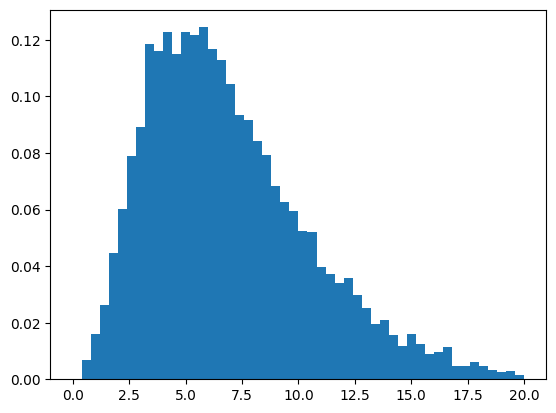

In [18]:
import matplotlib.pyplot as plt
plt.hist(data**2 + np.random.normal(loc=0.0, scale=1.0, size=10000)**2+ np.random.normal(loc=0.0, scale=1.0, size=10000)**2+ np.random.normal(loc=0.0, scale=1.0, size=10000)**2+ np.random.normal(loc=0.0, scale=1.0, size=10000)**2+ np.random.normal(loc=0.0, scale=1.0, size=10000)**2+ np.random.normal(loc=0.0, scale=1.0, size=10000)**2,range=(0,20),bins=50,density=True)